# Reproduce Results

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">


**IMPORTANT INFO:**

If there are random parts in the code, make sure to have **seeds to make your results reproducible**.

The `reproduce_results.ipynb` notebook:
- Is a responsability of all members of a group. All of you should execute this and ensure it works as expected.
- **Contain train/validation/test results of ROC AUC** (it is available in Scikit-learn: `sklearn.metrics.roc_auc_score`) as well as **precision** and **recall**.

Note that the teacher will only load and run this notebook, unless there is something very unclear requiring the execution of `train_models.ipynb` as well.

Additional notes:
- This notebook **does not have to train anything**.
- It should be relatively fast to execute (probably less than 10 minutes since there is no training).
- This notebook should only load previously trained models from disk. **After loading the models, it should make predictions and compute metrics**.
    
</div>

### Imports

In [2]:
import os
import pickle
import scipy
import pandas as pd
import sklearn
from utils import evaluate_model

## Load Data


A results NO hem de pujar la data original, sino el dataset (amb les features) q hem utilitzat per entrenar el model (+validation set + test set)

## Simple Solution

In [18]:
# load model
with open('model/simple_solution/simple_model.pkl', 'rb') as f:
    logistic = pickle.load(f)

In [31]:
# load data

with open('model/simple_solution/simple_model_X_tr.pkl','rb') as f:
    X_tr_q1q2 = pickle.load(f)  
    X_tr_q1q2 = scipy.sparse.csr_matrix(X_tr_q1q2) # converting to matrix
with open('model/simple_solution/simple_model_X_va.pkl','rb') as f:
    X_va_q1q2 = pickle.load(f)   
    X_va_q1q2 = scipy.sparse.csr_matrix(X_va_q1q2)
with open('model/simple_solution/simple_model_X_te.pkl','rb') as f:
    X_te_q1q2 = pickle.load(f)
    X_te_q1q2 = scipy.sparse.csr_matrix(X_te_q1q2)
with open('model/simple_solution/simple_model_y_tr.pkl','rb') as f:
    y_tr = pickle.load(f)
with open('model/simple_solution/simple_model_y_va.pkl','rb') as f:
    y_va = pickle.load(f)
with open('model/simple_solution/simple_model_y_te.pkl','rb') as f:
    y_te = pickle.load(f)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.8139789035173366
F1:  0.7313087927476779
Precision:  0.7820463974261281
Recall:  0.6867535943642599
ROC AUC:  0.7875053281482827

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86    184298
    Positive       0.78      0.69      0.73    107599

    accuracy                           0.81    291897
   macro avg       0.81      0.79      0.79    291897
weighted avg       0.81      0.81      0.81    291897

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


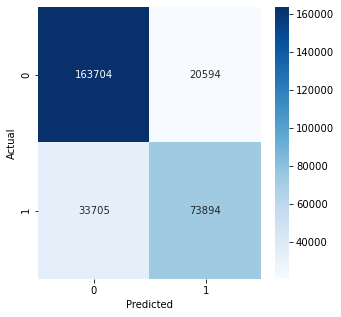

In [28]:
# Train results
train_metrics = evaluate_model(X_tr_q1q2, y_tr, model=logistic, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7489422638807525
F1:  0.6421081933747796
Precision:  0.6771037181996086
Recall:  0.6105523204517381
ROC AUC:  0.7201895265625028

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.78      0.83      0.81      9696
    Positive       0.68      0.61      0.64      5667

    accuracy                           0.75     15363
   macro avg       0.73      0.72      0.72     15363
weighted avg       0.75      0.75      0.75     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


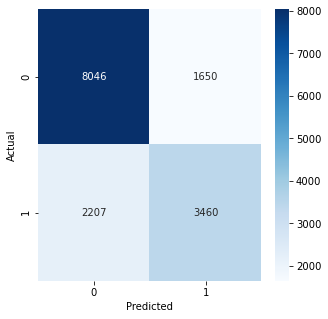

In [32]:
# Validation results
validation_metrics = evaluate_model(X_va_q1q2, y_va, model=logistic, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7576675735839723
F1:  0.654744075411858
Precision:  0.6953592814371258
Recall:  0.6186116197769269
ROC AUC:  0.7292271084620001

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.84      0.81     10165
    Positive       0.70      0.62      0.65      6007

    accuracy                           0.76     16172
   macro avg       0.74      0.73      0.73     16172
weighted avg       0.75      0.76      0.75     16172

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


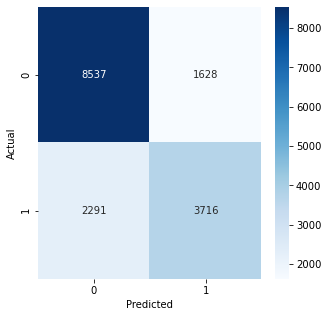

In [33]:
# Test results
test_metrics  = evaluate_model(X_te_q1q2, y_te, model=logistic, display=True)

## Improved Solution

### Text Cleaning and Basic Text Features

Results for the first approach, where we perform some data cleaning and add some basic text features.

In [3]:
# load model
with open('model/features_solution/features_model.pkl', 'rb') as f:
    logistic2 = pickle.load(f)
    
# load data

with open('model/features_solution/features_model_X_tr.pkl','rb') as f:
    X_tr_features_sparse = pickle.load(f)  
    X_tr_features_sparse = scipy.sparse.csr_matrix(X_tr_features_sparse) # converting to matrix
with open('model/features_solution/features_model_X_va.pkl','rb') as f:
    X_va_features_sparse = pickle.load(f)   
    X_va_features_sparse = scipy.sparse.csr_matrix(X_va_features_sparse)
with open('model/features_solution/features_model_X_te.pkl','rb') as f:
    X_te_features_sparse = pickle.load(f)
    X_te_features_sparse = scipy.sparse.csr_matrix(X_te_features_sparse)
with open('model/features_solution/features_model_y_tr.pkl','rb') as f:
    y_tr = pickle.load(f)
with open('model/features_solution/features_model_y_va.pkl','rb') as f:
    y_va = pickle.load(f)
with open('model/features_solution/features_model_y_te.pkl','rb') as f:
    y_te = pickle.load(f)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.8380627413094345
F1:  0.7761068192475475
Precision:  0.7913817085893127
Recall:  0.7614104220299445
ROC AUC:  0.8221126055607623

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87    184298
    Positive       0.79      0.76      0.78    107599

    accuracy                           0.84    291897
   macro avg       0.83      0.82      0.82    291897
weighted avg       0.84      0.84      0.84    291897

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


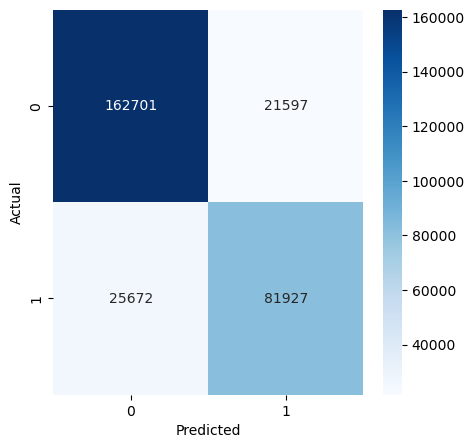

In [4]:
# train results
train_metrics2 = evaluate_model(X_tr_features_sparse, y_tr, model=logistic2, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7801861615569876
F1:  0.6932509764737943
Precision:  0.7143391988019469
Recall:  0.6733721545791425
ROC AUC:  0.7579938330651488

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      9696
    Positive       0.71      0.67      0.69      5667

    accuracy                           0.78     15363
   macro avg       0.76      0.76      0.76     15363
weighted avg       0.78      0.78      0.78     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


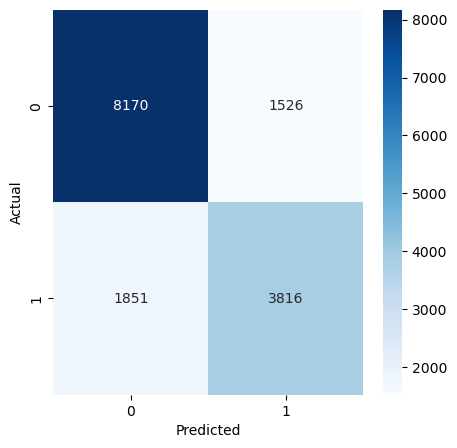

In [5]:
# validation results
validation_metrics2 = evaluate_model(X_va_features_sparse, y_va, model=logistic2, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.785864457086322
F1:  0.7038399042161978
Precision:  0.7237073513893775
Recall:  0.685034126852006
ROC AUC:  0.7652421003172968

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83     10165
    Positive       0.72      0.69      0.70      6007

    accuracy                           0.79     16172
   macro avg       0.77      0.77      0.77     16172
weighted avg       0.78      0.79      0.78     16172

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


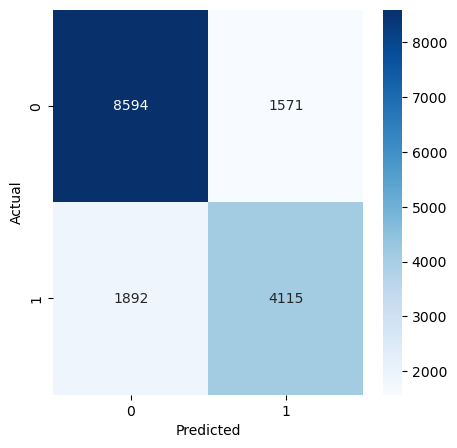

In [6]:
# test results
test_metrics2 = evaluate_model(X_te_features_sparse, y_te, model=logistic2, display=True)